In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [8]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000


In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
3383162,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24
3383163,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24
3383164,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26
3383165,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17
3383166,Bye Bye Blue Bird,1999,Rosa ? R?gvu,actress,Pensionatv?rtinde,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

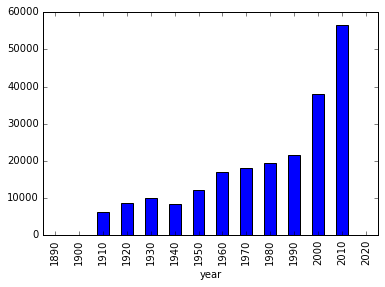

In [15]:
titles.groupby(titles.year // 10*10).size().plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

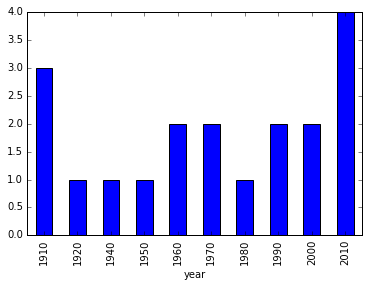

In [14]:
t = titles[titles.title == "Hamlet"]
t.groupby(t.year // 10*10).size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [24]:
c = cast[(cast.year // 10*10 == 1950) & (cast.n == 1)]
c.groupby(['type', 'year']).size()

type     year
actor    1950    605
         1951    636
         1952    592
         1953    638
         1954    629
         1955    614
         1956    621
         1957    711
         1958    700
         1959    686
actress  1950    278
         1951    273
         1952    284
         1953    294
         1954    298
         1955    271
         1956    294
         1957    290
         1958    278
         1959    299
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [26]:
c = cast[(cast.year // 10*10 == 1950) & (cast.n <= 5)]
c.groupby(['type', 'n']).size()

type     n
actor    1    6432
         2    4432
         3    5458
         4    5443
         5    5471
actress  1    2859
         2    4437
         3    3052
         4    2780
         5    2474
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

### What is happening here??

In [72]:
c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort_values(by='n').groupby(['year'])[['n']].max()
c

,n
year,
1963,15
2006,50
2016,NaN


In [69]:
c = cast
c = c[c.title == 'The Pink Panther']
c = c.groupby(['year']).n.max()
c

year
1963    15
2006    50
2016   NaN
Name: n, dtype: float64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [46]:
c = cast[cast.name == 'Frank Oz']
list = c.groupby(['year', 'title']).size()
list[list>1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [52]:
c = cast[cast.name == 'Frank Oz']
list = c.groupby('character').size()
list[list>2]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64